In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os,sys
import logging
# import dvc.api

sys.path.append(os.path.abspath(os.path.join('..')))
# import sys
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import mlflow
from sklearn import preprocessing
logging.basicConfig(filename='info.log', level=logging.INFO) 

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# sys.path.append(os.path.abspath(os.path.join('..')))
# from scripts.eda import EDA
# from scripts.plot import Plot

In [9]:
# path = 'data/train_fin.csv'
# repo = 'https://github.com/RYees/Pharmaceutical_Sales_prediction/'
# version = '3391a5959cf1b8946ca6b5bb37074332d6949a70'

# data_url = dvc.api.get_url(
# path = path,
# repo = repo,
# rev = version)

In [15]:
test_df = pd.read_csv("../data/com_test.csv")

# test_df = pd.read_csv("data/com_test.csv")
# train_df = train_df.drop(['index'],axis=1)
test_df.head(2)

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
0,2015-08-01,1,6,1.0,0,0,1,c,a,1270.0,...,2008.0,0,0.0,0.0,0,1,8,2015,213,31
1,2015-08-02,1,7,0.0,0,0,1,c,a,1270.0,...,2008.0,0,0.0,0.0,0,2,8,2015,214,31


In [12]:
train_df = pd.read_csv("../data/com_train.csv")
# train_df = train_df.drop(['index'],axis=1)
train_df.head(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
0,2013-01-01,1,2,0,0,0,0,a,1,c,...,2008.0,0,0.0,0.0,0,1,1,2013,1,1
1,2013-01-02,1,3,5530,668,1,0,0,1,c,...,2008.0,0,0.0,0.0,0,2,1,2013,2,1
2,2013-01-03,1,4,4327,578,1,0,0,1,c,...,2008.0,0,0.0,0.0,0,3,1,2013,3,1
3,2013-01-04,1,5,4486,619,1,0,0,1,c,...,2008.0,0,0.0,0.0,0,4,1,2013,4,1
4,2013-01-05,1,6,4997,635,1,0,0,1,c,...,2008.0,0,0.0,0.0,0,5,1,2013,5,1


In [ ]:
train_df = train_df.reset_index()
train_df = train_df.drop(['index'],axis=1)
train_df.head()

In [ ]:
train_df.info()

In [ ]:
# test_store = pd.read_csv('../data/test.csv')
# test_store

In [ ]:
# train_store = pd.read_csv('../data/train.csv')
# train_store

In [16]:
manipulate = DataManipulator(test_df)

In [17]:
manipulator = DataManipulator(train_df)

In [18]:
manipulator.add_week_day('DayOfWeek')
manipulate.add_week_day('DayOfWeek')

Data Manipulatior:INFO->Successfully Added WeekDay Column to the DataFrame
Data Manipulatior:INFO->Successfully Added WeekDay Column to the DataFrame


In [19]:
manipulator.add_number_of_days_to_holiday('StateHoliday')
manipulate.add_number_of_days_to_holiday('StateHoliday')

Data Manipulatior:INFO->Successfully Added DaysToHoliday Column
Data Manipulatior:INFO->Successfully Added DaysToHoliday Column


In [20]:
manipulator.add_number_of_days_after_holiday('StateHoliday')
manipulate.add_number_of_days_after_holiday('StateHoliday')

Data Manipulatior:INFO->Successfully Added DaysAfterHoliday Column
Data Manipulatior:INFO->Successfully Added DaysAfterHoliday Column


In [21]:
manipulator.add_month_timing('Day')
manipulate.add_month_timing('Day')

Data Manipulatior:INFO->Successfully Added MonthTiming Column
Data Manipulatior:INFO->Successfully Added MonthTiming Column


In [22]:
feats = ['Promo2SinceYear','Promo2SinceWeek','CompetitionDistance', 'PromoInterval']
modes = train_df[feats].mode()

for f in feats:
        train_df[f] = train_df[f].fillna(modes[f][0])
        test_df[f] = test_df[f].fillna(modes[f][0])
for dataset in (train_df,test_df):
    dataset['Open'] = dataset['Open'].fillna(0)

In [23]:
train_df.drop(['Store','Date','Customers','StoreType','Assortment'],axis=1,inplace=True)
test_df.drop(['Store','Date','StoreType','Assortment'],axis=1,inplace=True)

In [ ]:
# train_df = train_df[train_df['Sales'] < 25000]  #Drops samples which have sales more than 25000
# train_df.reset_index(drop=True).head()

In [24]:
## Label Encoder
attributes = ['StateHoliday','PromoInterval']
for dataset in (train_df,test_df):
    for f in attributes:
        dataset[attributes] = dataset[attributes].apply(lambda x: pd.factorize(x)[0])

In [25]:
train_df.drop(['PromoInterval'],axis=1,inplace=True)
test_df.drop(['PromoInterval'],axis=1,inplace=True)

In [26]:
# Only Use non-zero Sales Samples For Training
train_df = train_df[train_df['Open'] == 1]
train_df = train_df[train_df['Sales'] > 0.0]

In [27]:
# The Correlation with The Target 
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)
# corr_matrix["Sales"]

Sales                        1.000000
Promo                        0.368199
WeekDay                      0.151832
WeekOfYear                   0.074463
Month                        0.073589
DayOfYear                    0.068699
SchoolHoliday                0.038635
Year                         0.036151
DaysAfterHoliday             0.034628
CompetitionOpenSinceYear     0.005257
StateHoliday                -0.002531
CompetitionOpenSinceMonth   -0.018369
CompetitionDistance         -0.035526
DaysToHoliday               -0.038071
Day                         -0.051865
Promo2SinceWeek             -0.058493
MonthTiming                 -0.069087
Promo2                      -0.127556
Promo2SinceYear             -0.127581
DayOfWeek                   -0.178753
Open                              NaN
Name: Sales, dtype: float64

In [ ]:
train_df.head(2)

In [28]:
##assume 0 and '0' are the same in train.StateHoliday 
def mychange(x):
     if type(x)!= str: x=str(x)
     return x
        
train_df.StateHoliday = [mychange(x) for x in train_df.StateHoliday]

train_df = train_df.drop('StateHoliday',1).join(pd.get_dummies(train_df['StateHoliday']).rename(columns=lambda x: 'StateHoliday' +"_"+str(x)))  

In [29]:
test_df = test_df.drop('StateHoliday',1).join(pd.get_dummies(test_df['StateHoliday']).rename(columns=lambda x: 'StateHoliday' +"_"+str(x)))

In [30]:
toAppend = pd.DataFrame(np.log(train_df.Sales+1),dtype=float)
toAppend.columns.values[0]='LogSale'
train_df=train_df.join(toAppend)
train_df.dtypes

DayOfWeek                      int64
WeekDay                        int64
Sales                          int64
Open                           int64
Promo                          int64
DaysAfterHoliday               int64
DaysToHoliday                  int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Day                            int64
MonthTiming                    int64
Month                          int64
Year                           int64
DayOfYear                      int64
WeekOfYear                     int64
StateHoliday_0                 uint8
StateHoliday_1                 uint8
StateHoliday_2                 uint8
StateHoliday_3                 uint8
LogSale                      float64
dtype: object

In [31]:
train_df.drop(['Sales'],axis=1,inplace=True)

In [32]:
## check if there exists any constant variable
np.sum(train_df.var()==0)

1

In [ ]:
!pip install mlflow

In [33]:
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing
# from sklearn import utils

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# To setup mlflow
import mlflow
import mlflow.sklearn

In [ ]:
##### randomforest
# from sklearn.ensemble._forest import RandomForestRegressor

# ##### delete variables that do not exist in the test set
# toDrop = list(set(train_df.columns.values)-set(test_df.columns.values) )
# features = train_df.columns.drop(toDrop,1)

# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(train_df.drop(toDrop ,1).fillna(-1),train_df.LogSale)


# importances = rf.feature_importances_ 
# # return the indices that would sort the importance, decreasing
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")


# Features = train_df.columns.drop('LogSale')
# for f in range(35):
#     print("%d. feature %d :%s (%f)" % (f + 1, indices[f],Features[indices[f]], importances[indices[f]]))

# # Plot the feature importances of the forest
# # the most important feature 'open' is left out in the plot to make it easier to see the other features
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(1,10), importances[indices[range(1,10)]]) 
# plt.xlim([-1, 10])
# plt.show()

# # make prediction on test data
# mypred = rf.predict(test_df.drop('Id',1).fillna(-1))


In [34]:
# Using StandardScaler to standardize the all columns
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, LabelEncoder
scale_train_list = train_df.columns.to_list()
scale_test_list = test_df.columns.to_list()
def standardize_columns(df, column) -> pd.DataFrame:
    try:        
        std_column_df = pd.DataFrame(df[column])
        std_column_values = std_column_df.values
        standardizer = StandardScaler()
        normalized_data = standardizer.fit_transform(std_column_values)
        df[column] = normalized_data
        logging.info('Successfull data scaling')
        return df
    except:
        logging.info('error in scaling data')

In [35]:
standardize_columns(train_df, scale_train_list)

,DayOfWeek,WeekDay,Open,Promo,DaysAfterHoliday,DaysToHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,MonthTiming,Month,Year,DayOfYear,WeekOfYear,StateHoliday_0,StateHoliday_1,StateHoliday_2,StateHoliday_3,LogSale
1,-0.301877,0.460351,0.0,-0.897894,-0.378735,1.129809,2.04105,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.582218,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.328346
2,0.278266,0.460351,0.0,-0.897894,-0.034281,1.096842,2.04105,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.572353,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.905162
3,0.858410,0.460351,0.0,-0.897894,0.310172,1.063876,2.04105,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.562488,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.820311
4,1.438553,-2.172258,0.0,-0.897894,0.654626,1.030909,2.04105,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.552623,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.566658
6,-1.462165,0.460351,0.0,1.113717,-0.378735,0.964976,2.04105,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.532893,-1.504313,-0.028681,0.032847,-0.013106,-0.00917,0.284336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,-1.462165,0.460351,0.0,1.113717,-0.378735,-0.980052,2.04105,-0.012048,-1.150071,-1.464042,...,1.201070,0.347245,1.502764,0.449964,0.510986,-0.028681,0.032847,-0.013106,-0.00917,1.226423
1017205,-0.882021,0.460351,0.0,1.113717,-0.378735,-0.980052,2.04105,-0.012048,-1.150071,-1.464042,...,1.201070,0.347245,1.502764,0.459829,0.510986,-0.028681,0.032847,-0.013106,-0.00917,0.567124
1017206,-0.301877,0.460351,0.0,1.113717,-0.378735,-0.980052,2.04105,-0.012048,-1.150071,-1.464042,...,1.201070,0.347245,1.502764,0.469694,0.510986,-0.028681,0.032847,-0.013106,-0.00917,0.438126
1017207,0.278266,0.460351,0.0,1.113717,0.999080,-0.980052,2.04105,-0.012048,-1.150071,-1.464042,...,1.201070,0.347245,1.502764,0.479559,0.510986,-0.028681,0.032847,-0.013106,-0.00917,0.656076


In [36]:
standardize_columns(test_df, scale_test_list)

,DayOfWeek,WeekDay,Open,Promo,DaysAfterHoliday,DaysToHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceWeek,Promo2SinceYear,Day,MonthTiming,Month,Year,DayOfYear,WeekOfYear,StateHoliday_0,StateHoliday_1
0,1.002668,-1.558387,0.412874,-0.809427,-0.147034,1.428642,1.120204,-0.527160,1.084391,0.766220,...,-0.876652,-1.176605,-1.482045,-1.039723,-0.740532,0.0,-1.696335,-1.808937,0.066333,-0.066333
1,1.498833,-1.558387,-2.422047,-0.809427,-0.147034,1.422161,1.120204,-0.527160,1.084391,0.766220,...,-0.876652,-1.176605,-1.363679,-1.039723,-0.740532,0.0,-1.624150,-1.808937,0.066333,-0.066333
2,-1.478160,0.641689,0.412874,1.235442,-0.147034,1.415681,1.120204,-0.527160,1.084391,0.766220,...,-0.876652,-1.176605,-1.245313,-1.039723,-0.740532,0.0,-1.551966,-1.312771,0.066333,-0.066333
3,-0.981994,0.641689,0.412874,1.235442,-0.147034,1.409200,1.120204,-0.527160,1.084391,0.766220,...,-0.876652,-1.176605,-1.126946,-1.039723,-0.740532,0.0,-1.479781,-1.312771,0.066333,-0.066333
4,-0.485829,0.641689,0.412874,1.235442,-0.147034,1.402719,1.120204,-0.527160,1.084391,0.766220,...,-0.876652,-1.176605,-1.008580,-1.039723,-0.740532,0.0,-1.407597,-1.312771,0.066333,-0.066333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1.498833,-1.558387,-2.422047,-0.809427,-0.147034,-1.144173,-0.892695,0.037848,-1.051128,-1.303941,...,0.483242,0.850082,-0.061649,0.239936,1.350381,0.0,1.407597,1.168056,0.066333,-0.066333
41084,-1.478160,0.641689,0.412874,1.235442,-0.147034,-1.144173,-0.892695,0.037848,-1.051128,-1.303941,...,0.483242,0.850082,0.056717,0.239936,1.350381,0.0,1.479781,1.664222,0.066333,-0.066333
41085,-0.981994,0.641689,0.412874,1.235442,-0.147034,-1.144173,-0.892695,0.037848,-1.051128,-1.303941,...,0.483242,0.850082,0.175084,0.239936,1.350381,0.0,1.551966,1.664222,0.066333,-0.066333
41086,-0.485829,0.641689,0.412874,1.235442,-0.147034,-1.144173,-0.892695,0.037848,-1.051128,-1.303941,...,0.483242,0.850082,0.293450,0.239936,1.350381,0.0,1.624150,1.664222,0.066333,-0.066333


In [40]:
train_df = train_df.iloc[:1000,:]
train_df

,DayOfWeek,WeekDay,Open,Promo,DaysAfterHoliday,DaysToHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,MonthTiming,Month,Year,DayOfYear,WeekOfYear,StateHoliday_0,StateHoliday_1,StateHoliday_2,StateHoliday_3,LogSale
1,-0.301877,0.460351,0.0,-0.897894,-0.378735,1.129809,2.041050,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.582218,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.328346
2,0.278266,0.460351,0.0,-0.897894,-0.034281,1.096842,2.041050,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.572353,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.905162
3,0.858410,0.460351,0.0,-0.897894,0.310172,1.063876,2.041050,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.562488,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.820311
4,1.438553,-2.172258,0.0,-0.897894,0.654626,1.030909,2.041050,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.552623,-1.573806,-0.028681,0.032847,-0.013106,-0.00917,-0.566658
6,-1.462165,0.460351,0.0,1.113717,-0.378735,0.964976,2.041050,-0.534831,0.950950,0.682276,...,-1.256212,-1.457833,-1.070341,-1.532893,-1.504313,-0.028681,0.032847,-0.013106,-0.00917,0.284336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1.438553,-2.172258,0.0,-0.897894,-0.378735,-0.386654,-0.489944,-0.624524,1.417843,0.681207,...,-0.027571,0.948937,-1.070341,0.933347,0.927945,-0.028681,0.032847,-0.013106,-0.00917,-1.894336
1200,-1.462165,0.460351,0.0,-0.897894,-0.378735,-0.452587,-0.489944,-0.624524,1.417843,0.681207,...,-0.027571,0.948937,-1.070341,0.953077,0.997438,-0.028681,0.032847,-0.013106,-0.00917,-1.187744
1201,-0.882021,0.460351,0.0,-0.897894,-0.378735,-0.485554,-0.489944,-0.624524,1.417843,0.681207,...,-0.027571,0.948937,-1.070341,0.962942,0.997438,-0.028681,0.032847,-0.013106,-0.00917,-1.196339
1202,-0.301877,0.460351,0.0,-0.897894,-0.378735,-0.518520,-0.489944,-0.624524,1.417843,0.681207,...,-0.027571,0.948937,-1.070341,0.972807,0.997438,-0.028681,0.032847,-0.013106,-0.00917,-0.774633


# Random forest

In [41]:
y_values = train_df['LogSale']
x_values = train_df.drop(['LogSale'], axis=1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [43]:
rf = RandomForestRegressor()
# with mlflow.start_run() as run:
rf.fit(x_train, y_train)

train_score = rf.score(x_train, y_train)
valid_score = rf.score(x_valid,y_valid)
# valid_metrics = calculate_metrics(y_valid,rf.predict(x_valid),"Validation ")
test_score = rf.score(x_test,y_test)
# test_metrics = calculate_metrics(y_test, rf.predict(x_test), "Test ")
print(train_score)
print(valid_score)
print(y_valid,rf.predict(x_valid),"Validation ")

0.9657497215037635
0.6793394882177987
877   -1.025567
169   -0.986430
319   -0.532093
924   -0.545578
963   -0.215038
         ...   
417   -0.651457
526   -0.971291
584   -0.838728
560   -0.429123
779   -0.833979
Name: LogSale, Length: 160, dtype: float64 [-1.0818636  -0.49818466 -0.60464391 -0.65755904 -0.08443989 -0.70183652
 -1.17483641 -1.19600622 -0.15240582 -0.46079314 -1.19917967 -0.45479671
 -0.83217883 -0.20402008 -1.17766439 -1.02470063 -0.34517704 -1.22652958
 -1.31432629 -0.2906996  -1.22649289 -0.86477348 -0.47803483 -1.0181755
 -1.11929643 -0.77569323 -0.52290317 -2.14341719 -0.25081702  0.07148194
 -0.66008201 -0.42159412 -0.47531726 -2.06422782 -0.51567712 -0.84526601
 -1.24975619 -1.0224123  -0.64003153  0.09685124 -0.42077699 -0.29614493
 -0.48082347 -1.13883543 -0.61037009 -0.29048461 -1.03403343 -1.99478165
 -0.63466284 -0.03056965 -0.79837132 -0.94484772 -1.21589037 -0.88088775
 -0.77865806 -0.5709452   0.13485724 -0.165319   -0.64059033 -1.22505348
 -1.12150679 -

Feature: 0, Score: 0.12926
Feature: 1, Score: 0.04448
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.36132
Feature: 4, Score: 0.01777
Feature: 5, Score: 0.05595
Feature: 6, Score: 0.01032
Feature: 7, Score: 0.00992
Feature: 8, Score: 0.01459
Feature: 9, Score: 0.01126
Feature: 10, Score: 0.00942
Feature: 11, Score: 0.01352
Feature: 12, Score: 0.01172
Feature: 13, Score: 0.08902
Feature: 14, Score: 0.00484
Feature: 15, Score: 0.02352
Feature: 16, Score: 0.02295
Feature: 17, Score: 0.08609
Feature: 18, Score: 0.08405
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000


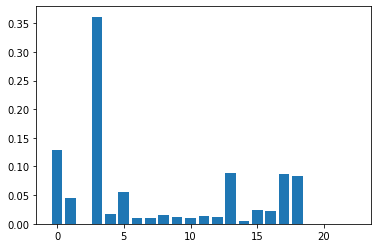

In [44]:
from matplotlib import pyplot
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [47]:
mlflow.autolog(log_input_examples=True, log_model_signatures=True, log_models=True, silent=True)
# Create a based model
rf = RandomForestRegressor()
with mlflow.start_run() as run:
    rf.fit(x_train, y_train)

    train_score = rf.score(x_train, y_train)
    valid_score = rf.score(x_valid,y_valid)
#     valid_metrics = calculate_metrics(y_valid,rf.predict(x_valid),"Validation ")
    test_score = rf.score(x_test,y_test)
#     test_metrics = calculate_metrics(y_test, rf.predict(x_test), "Test ")

    mlflow.log_metric("Valid Score", valid_score)
#     mlflow.log_metrics(valid_metrics)
    mlflow.log_metric("Test Score", test_score)
#     mlflow.log_metrics(test_metrics)
    save_model(rf, test_score['Test RMSE Score'])

NameError: name 'save_model' is not defined

In [48]:
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])